# DataSet1: the WDBC dataset

### 1. Read from dataset:

In [1]:
import pandas as pd

df = pd.read_csv('wdbc.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
# It is in the column at index 1
df.iloc[:,1].unique() #df.iloc[rows, colums]

array(['M', 'B'], dtype=object)

In [18]:
# Feature labels are as follows:
column_labels = ['patient_id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'mean concave points', 'mean symmetry', 'mean fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error',
'concave points error', 'symmetry error',
'fractal dimension error', 'worst radius', 'worst texture',
'worst perimeter', 'worst area', 'worst smoothness',
'worst compactness', 'worst concavity', 'worst concave points',
'worst symmetry', 'worst fractal dimension']

# This could also be done with: df.rename(columns={0:  'patient ID', etc.
df.columns = column_labels
# df

In [19]:
# We may want to change the 'M' and 'B' labels to full names so it's easier to read. Or not.
df['diagnosis'].replace('B', 'Benign', inplace = True)
df['diagnosis'].replace('M', 'Malignant', inplace = True)
# df

In [20]:
# Put the features, labels into their own dataframes
feature_df = df.iloc[:, 2:]
label_df = df.iloc[:, 1]
# feature_df

### 2. Apply a normalisation technique to the data

In [7]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution -- mean = 0; stdev = 1
from sklearn.preprocessing import StandardScaler
import numpy as np

x = feature_df.values
x = StandardScaler().fit_transform(x)
np.mean(x), np.std(x)

(1.2487570048507913e-18, 1.0)

In [21]:
# x is now a numpy array. Convert a numpy array back to a datafram.
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x ,columns = feat_cols)
normalised_breast.tail()
normalised_breast

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


### 3. Apply PCA to dataset

In [8]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_breast = PCA(n_components = 2)
principalComponents_breast = pca_breast.fit_transform(x)
principal_breast_df = pd.DataFrame(data = principalComponents_breast, \
                                   columns = ['principal component 1', 'principal component 2'])

principal_breast_df

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


In [9]:
label_df

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: diagnosis, Length: 569, dtype: object

In [53]:
# One thing that's often useful is "how much of the variance is explained"
# in any principal component. We can find out that 44.28% is explained
# by PC1; 18.97% by PC2:
print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

array([0.44272026, 0.18971182])

### 4. Show how instances and classes are related in the datasets

<Figure size 432x288 with 0 Axes>

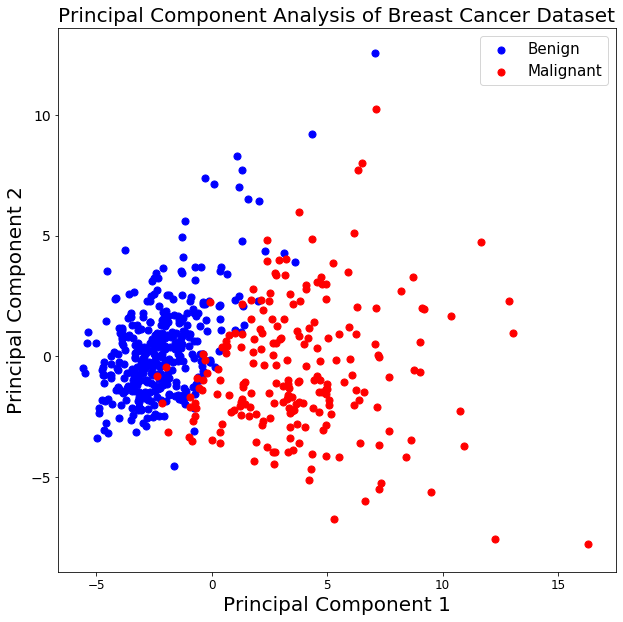

In [11]:
# The scatterplot shows how instances and classes are related to each other.
#"Classes" are the "M" vs. "B" labels in the WDBC dataset.
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = label_df == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### 5. Show the percentage of variance explained, starting from the first principal component

In [12]:
# How many principal components do we need to explain the variance in data?
pca = PCA().fit(x)

evr = pca.explained_variance_ratio_
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr)))
# FYI: We have to go to 6 significant digits to explain the last PC.

 0: 0.4427
 1: 0.1897
 2: 0.0939
 3: 0.0660
 4: 0.0550
 5: 0.0402
 6: 0.0225
 7: 0.0159
 8: 0.0139
 9: 0.0117
10: 0.0098
11: 0.0087
12: 0.0080
13: 0.0052
14: 0.0031
15: 0.0027
16: 0.0020
17: 0.0018
18: 0.0016
19: 0.0010
20: 0.0010
21: 0.0009
22: 0.0008
23: 0.0006
24: 0.0005
25: 0.0003
26: 0.0002
27: 0.0001
28: 0.0000
29: 0.0000


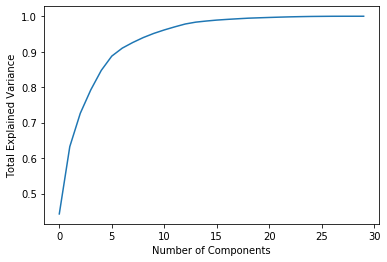

In [13]:
# Graph it...
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');

# DataSet2: the Gisette dataset

### 1. Read from Gisette dataset:

In [28]:
#Get data from Gisette
import pandas as pd

gisette_feature_df = pd.read_csv('gisette_train.data', header = None, delim_whitespace = True )
gisette_feature_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [29]:
#Get labels from Gisette
gisette_label_df = pd.read_csv('gisette_train.labels', header = None, delim_whitespace = True)
gisette_label_df = gisette_label_df.iloc[:, 0]
gisette_label_df.unique()

array([ 1, -1])

### 2. Apply a normalisation technique to the data

In [30]:
# Use sklearn to standardise (specifically: normalise) the data so that 
# the data has a normal distribution
from sklearn.preprocessing import StandardScaler
import numpy as np

gisette_x = StandardScaler().fit_transform(gisette_feature_df)
# Mean and stdev of normalized gisette data
np.mean(gisette_x), np.std(gisette_x)

(-2.17544500931884e-19, 0.9954898291795854)

### 3. Apply PCA to dataset

In [31]:
# Choose the first 2 principal components
from sklearn.decomposition import PCA

pca_gisette = PCA(n_components = 2)
principalComponents_gisette = pca_gisette.fit_transform(gisette_x)
principal_gisette_df = pd.DataFrame(data = principalComponents_gisette,
                                    columns = ['principal component 1', 'principal component 2'])
principal_gisette_df

,principal component 1,principal component 2
0,27.930735,6.382264
1,18.516328,-9.880842
2,10.245852,-13.196192
3,11.002994,-3.281855
4,-13.678287,-3.768916
...,...,...
5995,-5.267376,7.005055
5996,-10.807236,1.528993
5997,4.001789,-12.656102
5998,-4.213554,-13.101311


In [32]:
#We can find out that 2.88% is explained by PC1; 2.26% by PC2:
print('Explained variation per principal component: {}'.format(pca_gisette.explained_variance_ratio_))

Explained variation per principal component: [0.02883488 0.02258951]


### 4. Show how instances and classes are related in the datasets

<Figure size 432x288 with 0 Axes>

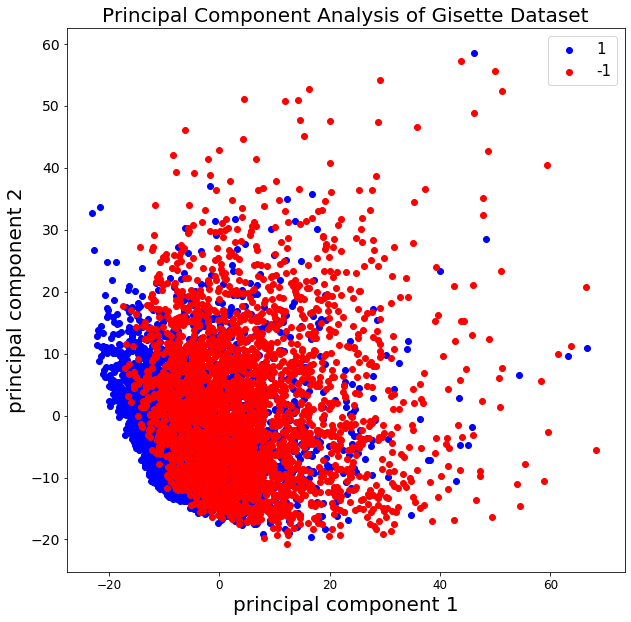

In [25]:
#Plot a scatterplot. It shows how the instances and classes(label:-1&1) related to each other.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.figure(figsize = (10,10))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 14)
plt.xlabel('principal component 1', fontsize = 20)
plt.ylabel('principal component 2', fontsize = 20)
plt.title("Principal Component Analysis of Gisette Dataset", fontsize = 20)
targets = [1, -1]
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indicesToKeep = gisette_label_df == target
    plt.scatter(principal_gisette_df.loc[indicesToKeep, 'principal component 1'],
                principal_gisette_df.loc[indicesToKeep, 'principal component 2'],
                c = color)
plt.legend(targets,prop = {'size': 15})

### 5. Show the percentage of variance explained, starting from the first principal component

In [34]:
pca_all_gisette = PCA().fit(gisette_x)
evr_gisette = pca_all_gisette.explained_variance_ratio_

# Due to too many components, I just print first 10 components.
print('\n'.join('{:2d}: {:0.4f}'.format(*k) for k in enumerate(evr_gisette[:10])))

 0: 0.0288
 1: 0.0226
 2: 0.0166
 3: 0.0162
 4: 0.0124
 5: 0.0114
 6: 0.0102
 7: 0.0088
 8: 0.0072
 9: 0.0069


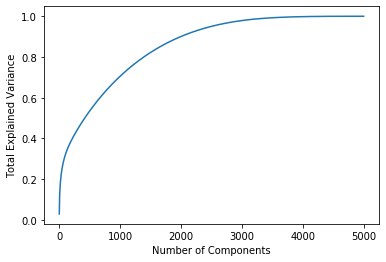

In [35]:
#Graph the percentage of variance.
plt.plot(np.cumsum(evr_gisette))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance');